<a href="https://colab.research.google.com/github/HanifRafandi014/3D_Machine_Learning/blob/main/3D_Hanif_Naufal_Rafandi_ML_Jobsheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Hanif Naufal Rafandi

Kelas : 3D / 14

NIM : 2141720127

Machine Learning Jobsheet Pertemuan 4

# **Praktikum 1**

**Support Vector Machine (Data Dummy)**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

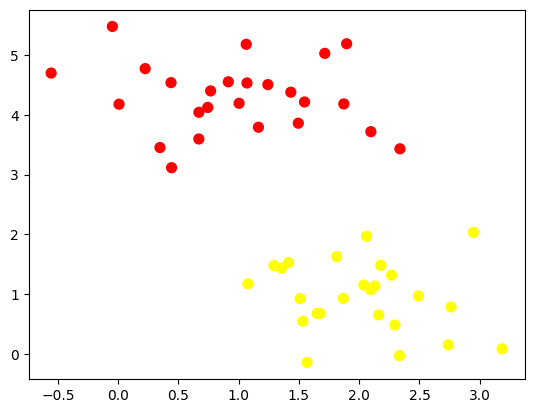

In [2]:
# Generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

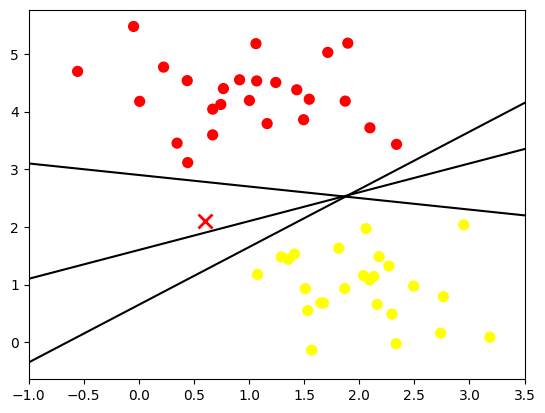

In [3]:
# Membuat garis pemisah data dari dua buah himpunan yang terbentuk lebih dari satu garis.
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

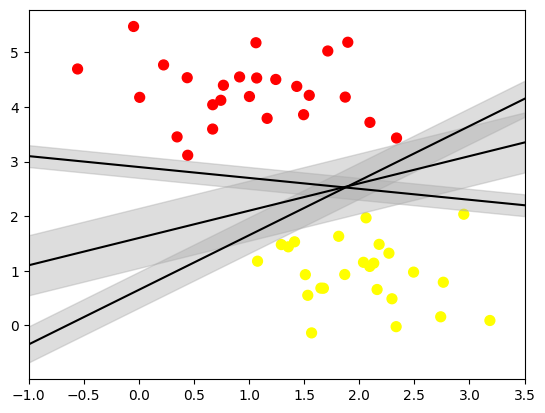

In [4]:
# Membuat margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Penerapan Fitting SVM**

In [5]:
from sklearn.svm import SVC # "Klasifikasi Support vector"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

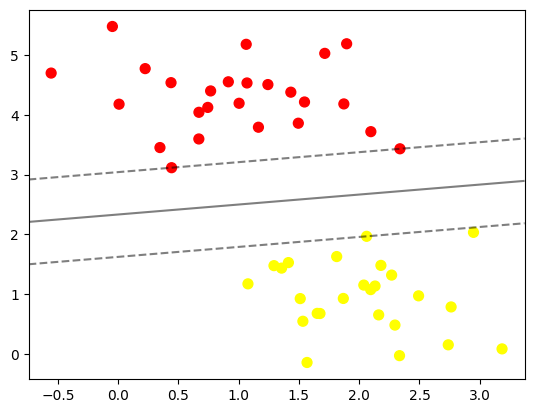

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
# beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

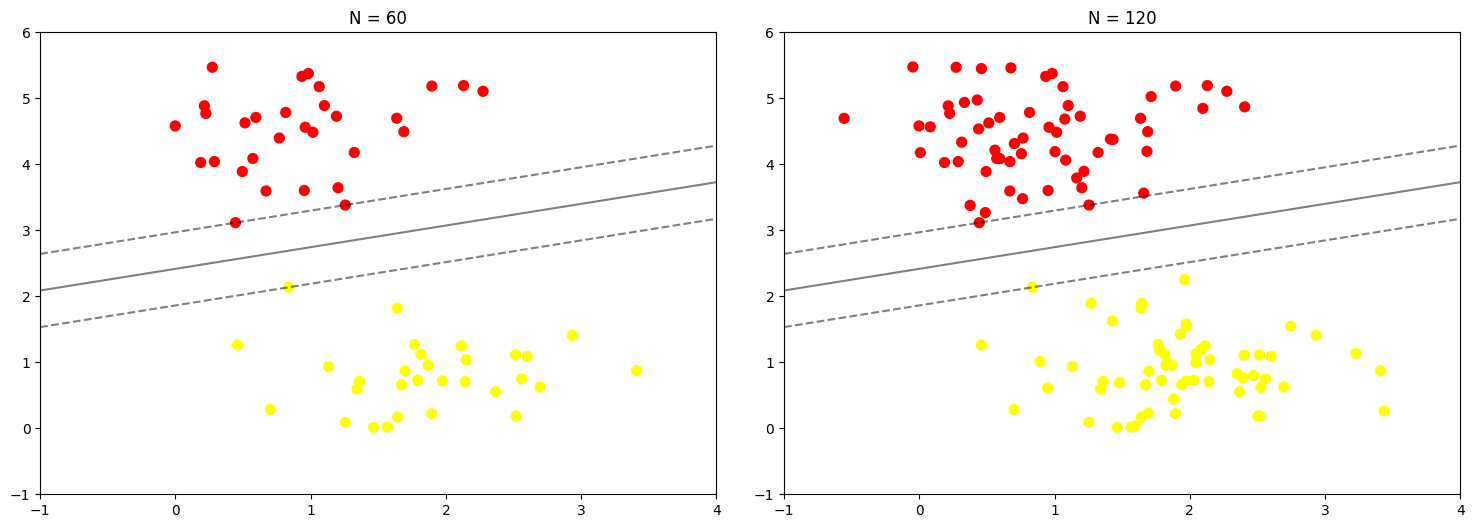

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Data Tidak Terpisah Secara Linier**

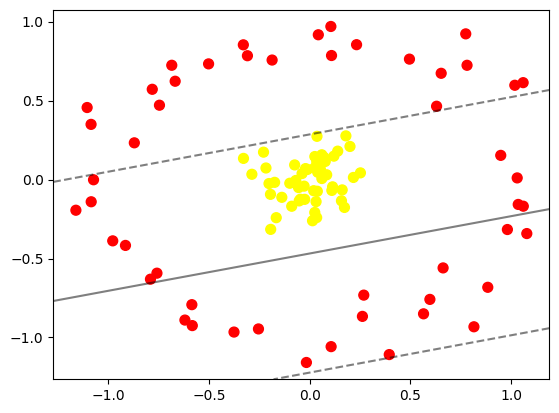

In [10]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [11]:
# Tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data.
# (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas.
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.39526402, -1.10811689],
       [ 0.88464624, -0.68217251],
       [-0.97817332, -0.38805849],
       [ 0.26200514, -0.86632699],
       [-0.22921811,  0.1734914 ],
       [ 1.06098126, -0.16864934],
       [-1.07354295, -0.001256  ],
       [-0.21711828,  0.07328771],
       [-0.3295154 ,  0.85310847],
       [-0.68496415,  0.72367034],
       [-0.66809541,  0.62255074],
       [ 0.02529628,  0.07497927],
       [ 0.10525647,  0.96927387],
       [-0.50211501,  0.73250899],
       [ 0.49562619,  0.76254635],
       [ 0.56557972, -0.85008768],
       [ 0.2172818 ,  0.01338532],
       [-0.75860315, -0.5927633 ],
       [ 0.02563369,  0.14579619],
       [-0.74608762,  0.47075513],
       [-0.052152  , -0.13510828],
       [ 1.0602585 ,  0.61359514],
       [-0.17415259, -0.01753286],
       [-0.58300956, -0.92464981],
       [ 0.03513354,  0.11394146],
       [ 0.23290431,  0.85400503],
       [ 0.03182885, -0.13960323],
       [

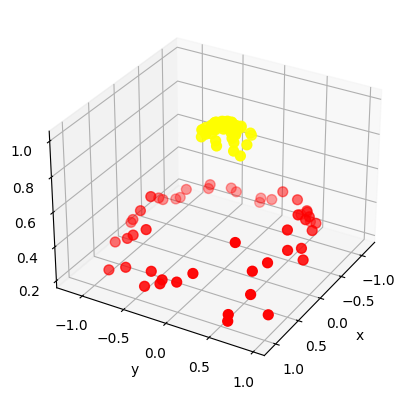

In [12]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

In [13]:
# kernel radial basis function (RBF) pada Scikit-Learn digunakan
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
SVC(C=1000000.0)

SVC(C=1000000.0)

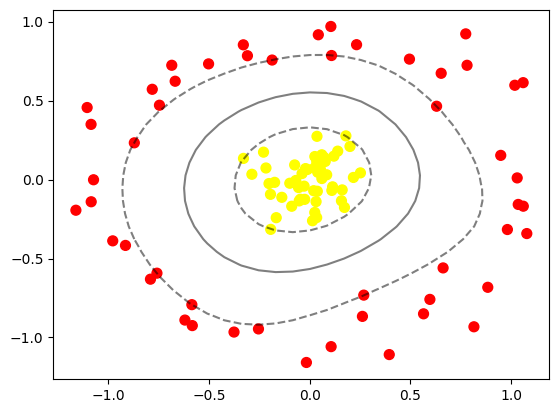

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

**Data Overlap**

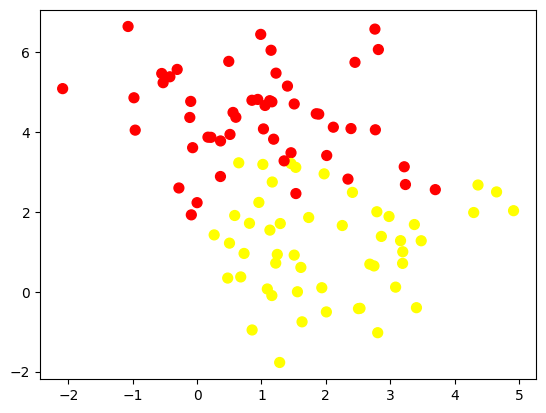

In [15]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

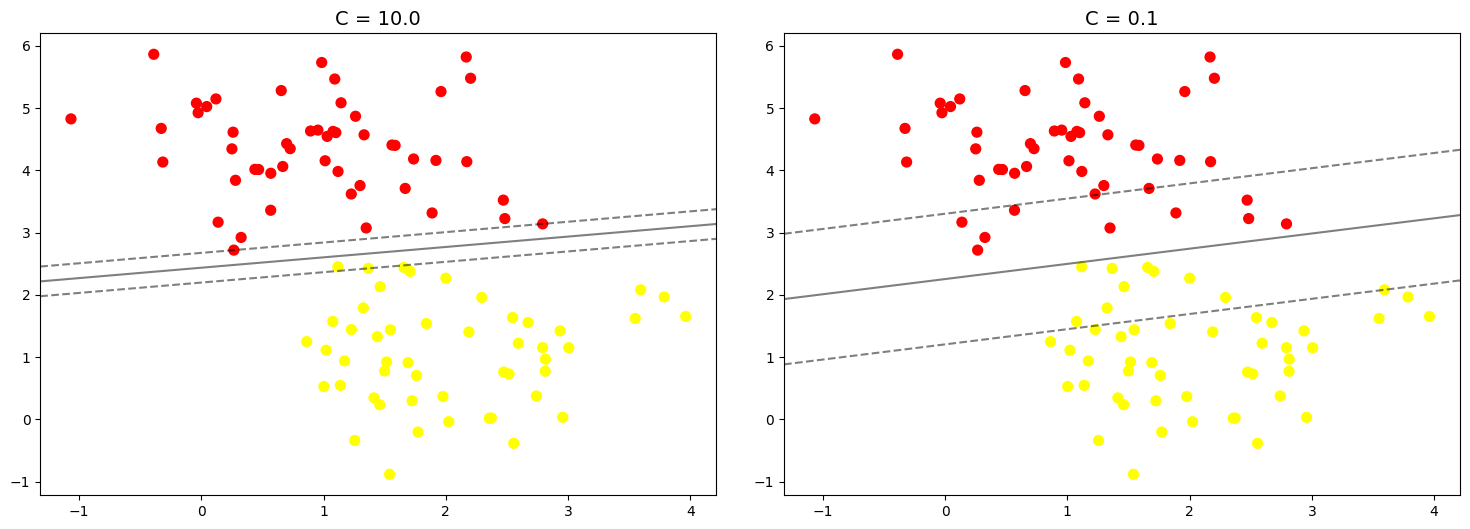

In [16]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **Praktikum 2**

**SVM pada Image**

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


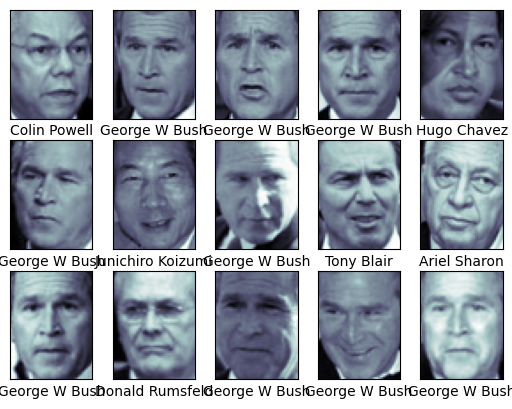

In [18]:
# contoh wajah yang digunakan
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [20]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 58.9 s, sys: 40.6 s, total: 1min 39s
Wall time: 1min 11s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [22]:
# prediksi label untuk data testing
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

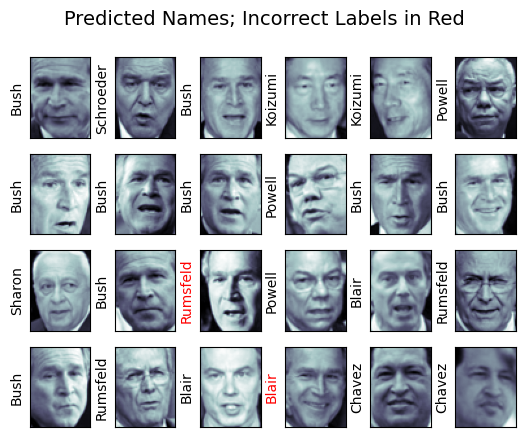

In [23]:
# hasil label pada data testing
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

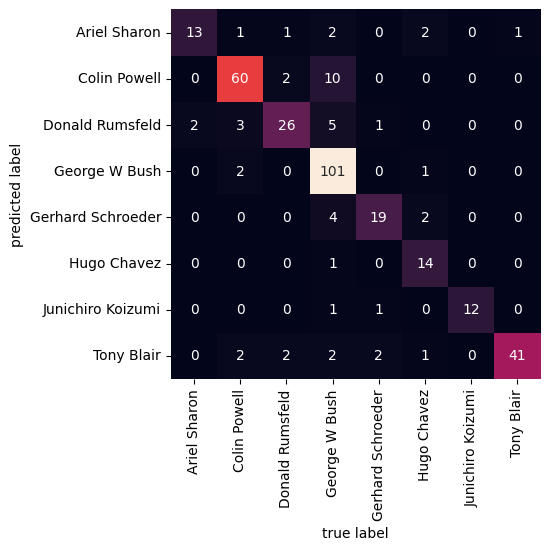

In [25]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Praktikum 3**

**Naive Bayes dengan data Dummy**

**Mendefinisikan Data Dummy**

In [26]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[101  98]
 [123  16]
 [ 71 200]
 [ 90 131]
 [154  90]
 [114  43]
 [109  69]
 [130   5]
 [238 191]
 [187 156]
 [ 12  38]
 [143 127]
 [ 79  84]
 [ 55  72]
 [192 164]
 [162 139]
 [ 38 211]
 [ 86 104]
 [112  71]
 [ 99 132]
 [146   9]
 [ 82 143]
 [133  50]
 [ 69 118]
 [ 67 112]
 [ 96  78]
 [ 44 125]
 [111 105]
 [132  75]
 [184  45]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,
1. n_samples: jumlah sampel yang diinginkan
2. n_features: jumlah fitur yang digunakan
3. n_classes: jumlah kelas
4. n_informative: jumlah fitur yang memiliki korelasi dengan kelas
5. n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas
6. n_repeated: jumlah fitur yang diulang

**Opsional Membuat Data Frame**

In [27]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,101,98,0
1,123,16,0
2,71,200,0
3,90,131,0
4,154,90,0


In [28]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,101,98,Kelas B
1,123,16,Kelas B
2,71,200,Kelas B
3,90,131,Kelas B
4,154,90,Kelas B


**Opsional Visualisasi Data**

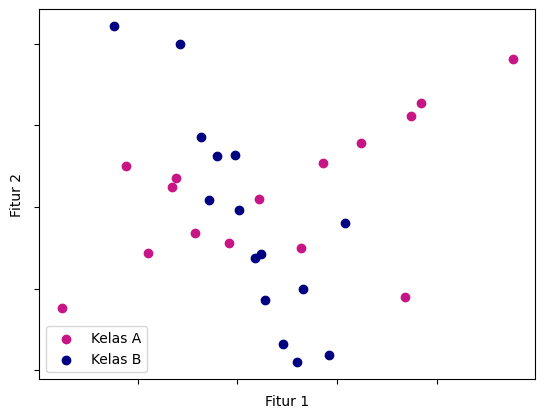

In [29]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

**Klasifikasi Multinomial Naive Bayes**

In [30]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.38095238095238093
Hasil akurasi data test: 0.3333333333333333


**Klasifikasi Gaussian Naive Bayes**

In [31]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7619047619047619
Hasil akurasi data test (Gaussian): 0.6666666666666666


# **Praktikum 4**

**Multinomial Naive Bayes**

**Load Data**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/File Machine Learning/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Pra Pengolahan Data**

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

**Drop Kolom**

In [37]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Ubah Nama Kolom V1 dan V2**

In [38]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Inspeksi Data**

In [39]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


**Data untuk label**

In [40]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Memisahkan Fitur dengan Label**

In [41]:
X = df['SMS'].values
y = df['Labels'].values

**Ekstraksi fitur**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

print("['" + "', '".join(bow.get_feature_names_out()) + "']")
print(f'Dimensi data: {X_train.shape}')

['00', '000', '000pes', '008704050406', '0089', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '07808', '07808247860', '07815296484', '07821230901', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08701213186', '08701417012', '08701417012150p', '0870141701216', '087016248', '08701752560', '087018728737', '0870241182716', '087

**Training dan Evaluasi Model**

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# **Tugas Pertemuan 4**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara.
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

  a. Menggunakan data spam.csv

  b. Fitur CountVectorizer dengan mengaktifkan stop_words
  
  c. Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

  a. Menggunakan data spam.csv

  b. Fitur TF-IDF dengan mengaktifkan stop_words

  c. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

  d. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

**Import Data**

In [45]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
dfvoice = pd.read_csv('/content/drive/MyDrive/File Machine Learning/voice.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
dfvoice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Soal No 1**

**Hitung jumlah kemunculan setiap nilai (unique value) dalam kolom 'label' pada DataFrame 'df'**

In [49]:
dfvoice['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

**Mengkodekan variabel kategori (label) menjadi nilai numerik**

In [50]:
#Mengubah male dan female menjadi angka 0 dan 1
encoder = LabelEncoder()
dfvoice['label'] = encoder.fit_transform(df['label'])
dfvoice['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Buat Heatmap Hubungan Dataframe dfvoice

<ipython-input-51-79fde4ca3aa4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


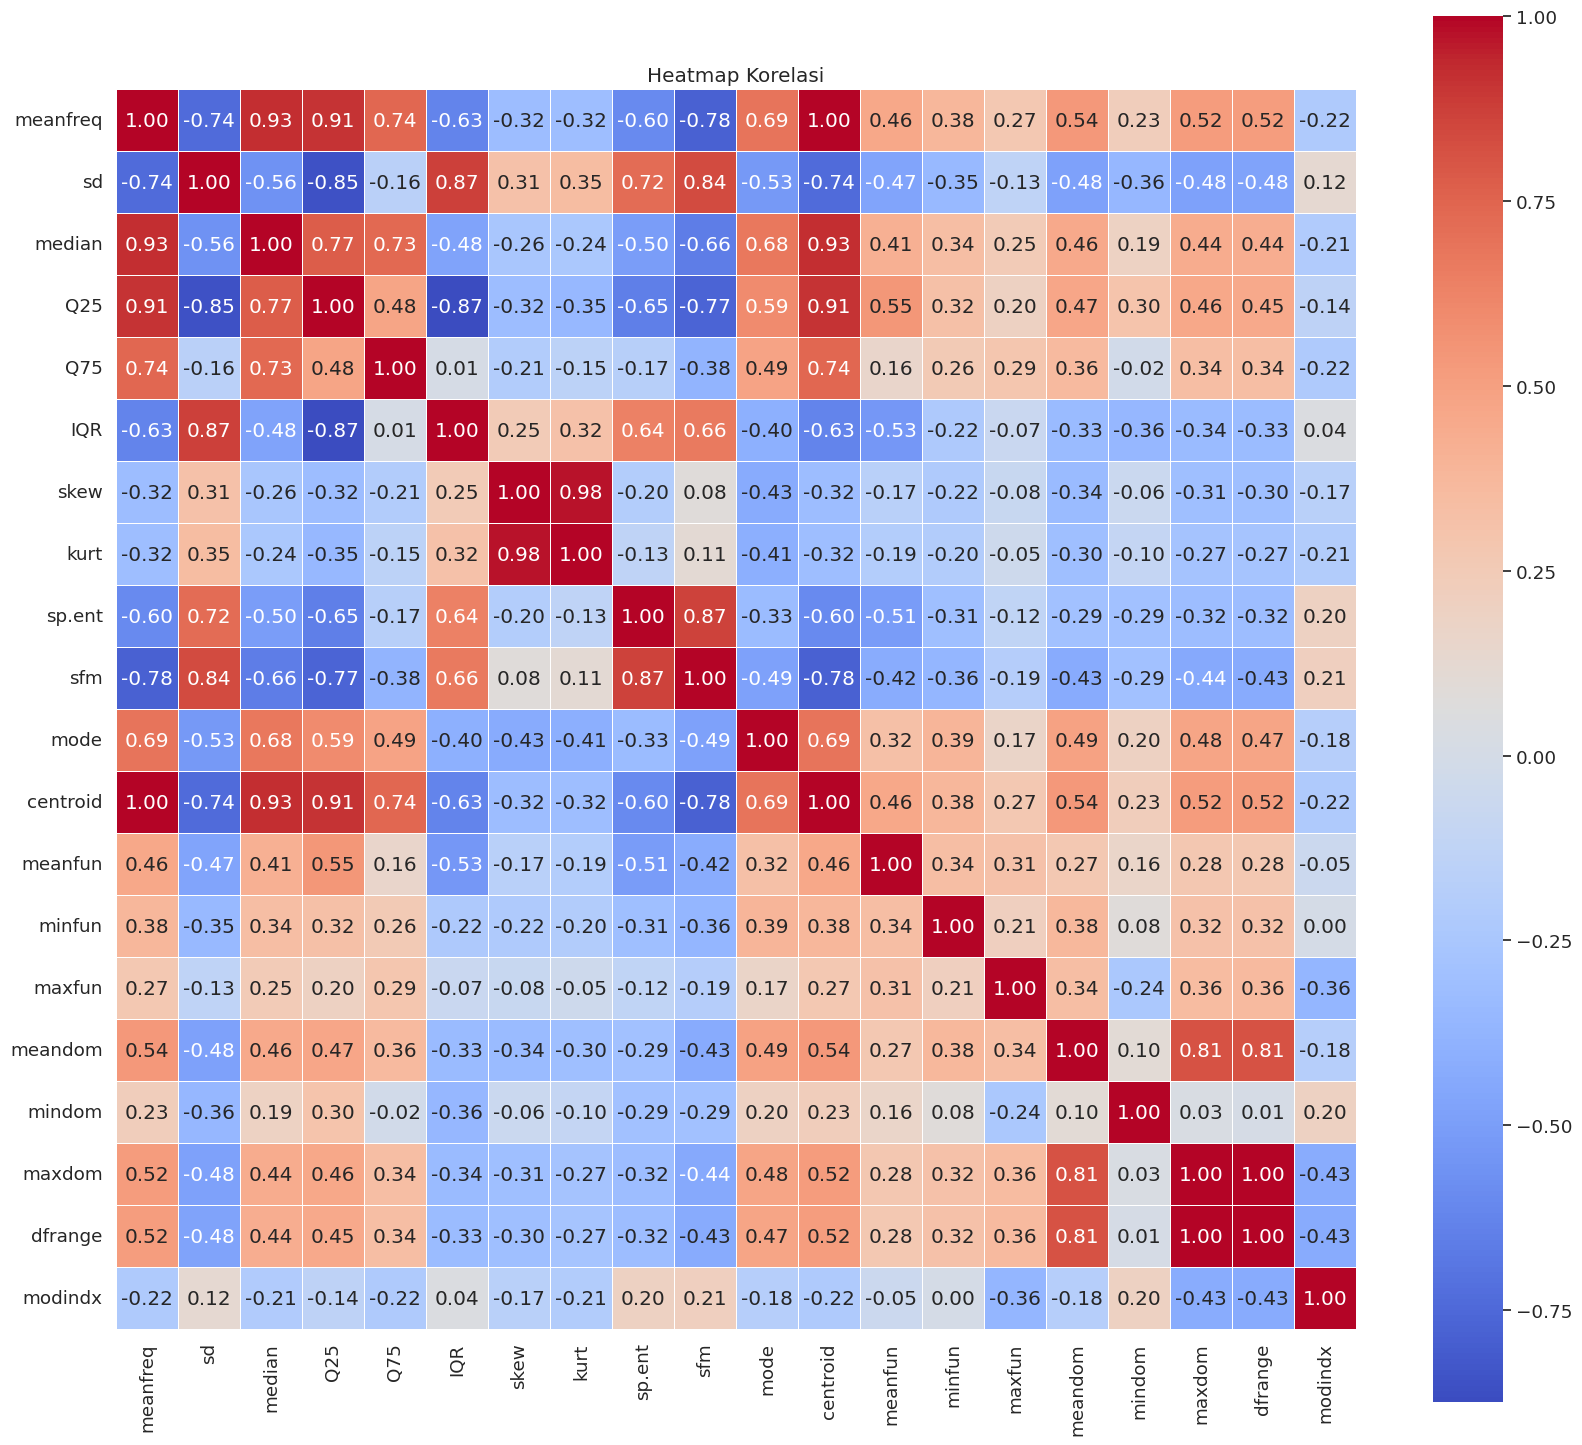

In [51]:
# Buat sebuah heatmap korelasi dari DataFrame 'dfvoice' menggunakan pustaka seaborn (sns) dan matplotlib (plt)
plt.figure(figsize=(20, 18))
corr_matrix = df.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".2f",
            annot=True,
            cbar=True,
            square=True)

plt.title('Heatmap Korelasi')
plt.show()

**Identifikasi Variabel Independen dan Dependen**

In [52]:
X = dfvoice.iloc[:,:20]
y = dfvoice.label

**Split Data Training dan Testing menjadi 70:30**

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
x1 = type(X.to_numpy())
x1

numpy.ndarray

In [54]:
dfvoice.drop(['dfrange', 'centroid'], axis=1, inplace=True)
X = dfvoice[dfvoice.columns.difference(['label'])]
y = dfvoice['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.21477826, -2.57610164, -5.69360723, ...,  0.4715753 ,
         2.29330585, -0.03908279],
       [-0.25848536, -2.48688452, -5.58898726, ...,  0.59443122,
         4.54805598, -0.06523603],
       [ 0.90932569, -2.7069865 , -3.92869875, ...,  0.39826097,
         6.51365636, -1.08373029],
       ...,
       [ 2.49266553, -2.1990394 , -0.01712269, ...,  1.38585653,
        -0.29804429,  1.15019826],
       [ 2.15365344, -1.99185206, -0.20402146, ...,  1.50571108,
        -0.36536651,  1.22984967],
       [ 2.25467137, -1.44608897,  1.10267866, ...,  1.08912637,
        -0.33848726,  0.97175912]])

Text(0, 0.5, 'No. of persons')

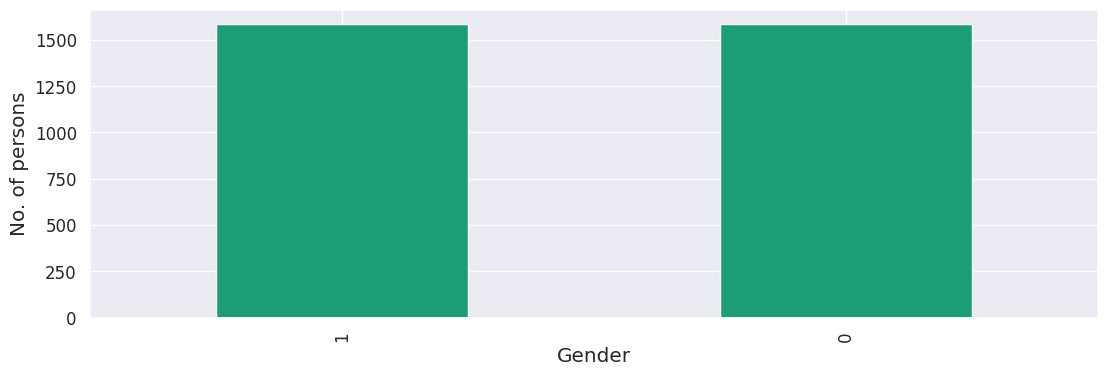

In [57]:
dfvoice['label'].value_counts().plot(kind='bar',figsize = (13,4),fontsize = 12,colormap='Dark2')
plt.xlabel('Gender')
plt.ylabel('No. of persons')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Perhitungan Akurasi SVM**

In [59]:
# Import SVM
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {int(acc * 100)}%')

Accuracy Score : 98%


**Soal No 2**

**Import Library dan Load Data**

In [60]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import itertools
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

dfspam = pd.read_csv('/content/drive/MyDrive/File Machine Learning/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
dfspam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Ubah Nama Kolom**

In [61]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'Message'
}

# Rename nama kolom v1 dan v2
dfspam = dfspam.rename(columns=new_cols)

# cek data
dfspam.head()

,Labels,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Drop Kolom**

In [62]:
# Drop 3 kolom terakhir dengan fungsi iloc
dfspam = dfspam.drop(dfspam.iloc[:,2:], axis=1)

# Cek data
dfspam.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
# Cek Jumlah Data Per Kelas
print(dfspam['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(dfspam.info())
print('\n')

# Cek Statistik Deskriptif
print(dfspam.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Labels   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                 Message
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


**Encoding Labels**

In [64]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
dfspam['Labels'] = dfspam['Labels'].map(new_labels)

# Cek data
dfspam.head()

,Labels,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Memisahkan Fitur dengan Label**

In [65]:
X = dfspam["Message"].values
y = dfspam["Labels"].values

**Ekstraksi Fitur**

In [66]:
# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.2)

# Inisiasi CountVectorizer & Penggunaan stop_words
cntVtr = CountVectorizer(stop_words = 'english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = cntVtr.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = cntVtr.transform(X_test)

In [67]:
X_train
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
model = MultinomialNB()

# Fit model
model.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data pengujian
y_pred_test = model.predict(X_test)

# Evaluasi akurasi data pengujian
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:f}%')
print(f'Hasil akurasi data test: {acc_test * 100:f}%')

Hasil akurasi data train: 99.461521%
Hasil akurasi data test: 98.295964%


**Soal No 3**



**Memisahkan Fitur dengan Label**

In [69]:
X = dfspam["Message"].values
y = dfspam["Labels"].values

**Ekstraksi Fitur TF-IDF**

In [70]:
# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.2)

# Inisiasi TfidfVectorizer & Penggunaan stop_words
TfidfVctr = TfidfVectorizer(stop_words = 'english')

# Fitting dan transform X_train dengan TfidfVectorizer
X_train = TfidfVctr.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh TfidfVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = TfidfVctr.transform(X_test)

In [73]:
X_train
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
model = MultinomialNB()

# Fit model
model.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data pengujian
y_pred_test = model.predict(X_test)

# Evaluasi akurasi data pengujian
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:f}%')
print(f'Hasil akurasi data test: {acc_test * 100:f}%')

Hasil akurasi data train: 98.429437%
Hasil akurasi data test: 96.053812%


**Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv**

### Kesimpulan
Berdasarkan hasil evaluasi akurasi pada model klasifikasi Multinomial Naive Bayes menggunakan dua jenis fitur, yaitu CountVectorized (CV) dan TF-IDF (Term Frequency-Inverse Document Frequency), dapat ditarik beberapa kesimpulan:

- CountVectorized (CV):

    - Akurasi data training menggunakan CV adalah sekitar 99.461521%
    - Akurasi data testing menggunakan CV adalah sekitar 98.295964%
    - Hasil akurasi yang tinggi pada data training dan testing menunjukkan bahwa model yang menggunakan fitur CV sangat baik dalam memprediksi apakah sebuah pesan adalah spam atau bukan.
    - Model ini mungkin agak overfitting (kondisi di mana model machine learning terlalu "terbiasa" dengan data pelatihan (data train) yang digunakan untuk melatihnya, sehingga tidak dapat generalisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya. Dalam kasus overfitting, model dapat "menghafal" data pelatihan dengan sangat baik, tetapi kinerjanya menurun saat diterapkan pada data baru) karena perbedaan antara akurasi data training dan testing cukup besar, tetapi hasil akurasi pada testing masih sangat tinggi.

- TF-IDF (TfIdfVectorized):

    - Akurasi data training menggunakan TF-IDF adalah sekitar 98.429437%
    - Akurasi data testing menggunakan TF-IDF adalah sekitar 96.053812%
    - Model yang menggunakan fitur TF-IDF juga memiliki hasil akurasi yang baik, meskipun sedikit lebih rendah dibandingkan dengan model menggunakan CV.
    - Perbedaan antara akurasi data training dan testing lebih kecil, menunjukkan model TF-IDF mungkin lebih umum dan tidak terlalu spesifik pada data training.

**Dari hasil yang sudah dijalankan, saya lebih memilih metode dengan TF-IDF yang dimana meskipun lebih akurat CV namun TF-IDF lebih fleksibel dalam mengelola data klasifikasi**